In [9]:
from rdkit import Chem
import pandas as pd
def extract_skeletons(smiles_list):
    skeletons_dict = {}
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            print("无法解析 SMILES 表示: ", smiles)
            continue
        else:
            skeleton = Chem.MolToSmiles(mol, rootedAtAtom=0, canonical=False)
            skeletons_dict[smiles] = skeleton
    return skeletons_dict

# 例子：化合物的 SMILES 列表
data = pd.read_csv('./train_dataset.csv')
compounds_smiles = []
for i in data.canonical_smiles:
    compounds_smiles.append(i)

# 分析化合物骨架
skeletons = extract_skeletons(compounds_smiles)

# 打印结果
print("化合物骨架:")
for smiles, skeleton in skeletons.items():
    print(smiles, ":", skeleton)

化合物骨架:
CC1OC(n2cc(-c3ccccc3)c3c(Nc4cccnc4)ncnc32)C(O)C1O : CC1OC(n2cc(-c3ccccc3)c3c(Nc4cccnc4)ncnc23)C(O)C1O
NCC1OC(n2cc(Br)c3c(N)ncnc32)C(O)C1O : NCC1OC(n2cc(Br)c3c(N)ncnc23)C(O)C1O
CCC1(c2ccc(CSc3ccc(F)cc3F)cc2)Oc2ccccc2-n2cccc2C1=O : CCC1(c2ccc(CSc3ccc(F)cc3F)cc2)Oc2ccccc2-n2cccc2C1=O
Nc1ncnc2c1c(-c1ccc3c4c(cccc14)CC3)cn2C1OC(CO)C(O)C1O : Nc1ncnc2c1c(-c1ccc3c4c(cccc14)CC3)cn2C1OC(CO)C(O)C1O
O=C(CNc1ncnc2c1c(-c1ccccc1)cn2C1OC(CO)C(O)C1O)NC1CC1 : O=C(CNc1ncnc2c1c(-c1ccccc1)cn2C1OC(CO)C(O)C1O)NC1CC1
CSc1ncnc2c1c(I)cn2C1OC(C)C(O)C1O : CSc1ncnc2c1c(I)cn2C1OC(C)C(O)C1O
CC(C)CNC(=O)CNc1ncnc2c1c(-c1ccccc1)cn2C1OC(C)C(O)C1O : CC(C)CNC(=O)CNc1ncnc2c1c(-c1ccccc1)cn2C1OC(C)C(O)C1O
CCCCCc1cc2c(N)ncnc2nc1-c1ccc(N(C)C)cc1 : CCCCCc1cc2c(N)ncnc2nc1-c1ccc(N(C)C)cc1
OCC1OC(n2cc(Cl)c3c(-c4ccccc4)ncnc32)C(O)C1O : OCC1OC(n2cc(Cl)c3c(-c4ccccc4)ncnc23)C(O)C1O
CC1OC(n2cc(-c3ccccc3)c3c(Nc4ccc(C#N)cc4)ncnc32)C(O)C1O : CC1OC(n2cc(-c3ccccc3)c3c(Nc4ccc(C#N)cc4)ncnc23)C(O)C1O
CN(C)c1ccc(C#Cc2ncnc(N3CCNCC3)c2-c2cc

### Murko骨架

In [11]:
#   总的
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Scaffolds import MurckoScaffold
from collections import defaultdict

# 读取数据
data = pd.read_csv('./ADK-chembl-568.csv')
smiles_list = data['canonical_smiles'].tolist()

def extract_skeleton(smiles):
    """提取给定SMILES字符串的Murcko骨架"""
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    scaffold = Chem.MolToSmiles(Chem.Scaffolds.MurckoScaffold.GetScaffoldForMol(mol), isomericSmiles=False)
    return scaffold

# 统计骨架
skeleton_counts = defaultdict(int)
for smiles in smiles_list:
    skeleton = extract_skeleton(smiles)
    if skeleton:
        skeleton_counts[skeleton] += 1

# 输出骨架统计结果
num_unique_skeletons = len(skeleton_counts)
print(f"Murko骨架的总种类数: {num_unique_skeletons}")

# 找出出现次数在10次以内的分子骨架
skeletons_fewer_than_10 = {skeleton for skeleton, count in skeleton_counts.items() if count <= 10}
num_skeletons_fewer_than_10 = len(skeletons_fewer_than_10)
print(f"出现次数在10次以内的Murko骨架种类数: {num_skeletons_fewer_than_10}")

# 计算出现次数在10次以内的碳骨架种类数占总碳骨架种类数的比例
if num_unique_skeletons > 0:
    proportion_fewer_than_10 = num_skeletons_fewer_than_10 / num_unique_skeletons
    print(f"出现次数在10次以内的Murko骨架种类数占的比例: {proportion_fewer_than_10:.2f}")
else:
    print("没有Murko骨架数据可用于计算比例。")

Murko骨架的总种类数: 246
出现次数在10次以内的Murko骨架种类数: 240
出现次数在10次以内的Murko骨架种类数占的比例: 0.98


In [16]:
import pandas as pd
from rdkit import Chem
from collections import defaultdict

# 读取数据
data = pd.read_csv('./1.csv')
smiles_list = data['canonical_smiles'].tolist()

def extract_skeleton(smiles):
    """提取给定SMILES字符串的Murcko骨架"""
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    scaffold = Chem.MolToSmiles(Chem.Scaffolds.MurckoScaffold.GetScaffoldForMol(mol), isomericSmiles=False)
    return scaffold

# 统计骨架
skeleton_counts = defaultdict(int)
for smiles in smiles_list:
    skeleton = extract_skeleton(smiles)
    if skeleton:
        skeleton_counts[skeleton] += 1

# 输出骨架统计结果
num_unique_skeletons = len(skeleton_counts)
print(f"Murko骨架的总种类数: {num_unique_skeletons}")

# 找出出现次数在10次以内的分子骨架
skeletons_fewer_than_10 = {skeleton for skeleton, count in skeleton_counts.items() if count <= 10}
num_skeletons_fewer_than_10 = len(skeletons_fewer_than_10)
print(f"出现次数在10次以内的Murko骨架种类数: {num_skeletons_fewer_than_10}")

# 计算出现次数在10次以内的碳骨架种类数占总碳骨架种类数的比例
if num_unique_skeletons > 0:
    proportion_fewer_than_10 = num_skeletons_fewer_than_10 / num_unique_skeletons
    print(f"出现次数在10次以内的Murko骨架种类数占的比例: {proportion_fewer_than_10:.2f}")
else:
    print("没有Murko骨架数据可用于计算比例。")

AttributeError: module 'rdkit.Chem' has no attribute 'Scaffolds'

In [6]:
import pandas as pd
from rdkit import Chem
from collections import defaultdict
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Scaffolds import MurckoScaffold
import matplotlib.pyplot as plt
# 读取数据
data = pd.read_csv('./0.csv')
smiles_list = data['canonical_smiles'].tolist()

def extract_skeleton(smiles):
    """提取给定SMILES字符串的Murcko骨架"""
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    scaffold = Chem.MolToSmiles(Chem.Scaffolds.MurckoScaffold.GetScaffoldForMol(mol), isomericSmiles=False)
    return scaffold
# 提取Murcko scaffold并统计数量
scaffold_dict = {}

for smi in smiles_list:
    mol = Chem.MolFromSmiles(smi)
    scaffold = MurckoScaffold.GetScaffoldForMol(mol)
    scaffold_smiles = Chem.MolToSmiles(scaffold)
    if scaffold_smiles in scaffold_dict:
        scaffold_dict[scaffold_smiles] += 1
    else:
        scaffold_dict[scaffold_smiles] = 1
# 统计骨架
skeleton_counts = defaultdict(int)
for smiles in smiles_list:
    skeleton = extract_skeleton(smiles)
    if skeleton:
        skeleton_counts[skeleton] += 1

# 输出骨架统计结果
num_unique_skeletons = len(skeleton_counts)
print(f"Murko骨架的总种类数: {num_unique_skeletons}")

# 找出出现次数在10次以内的分子骨架
skeletons_fewer_than_10 = {skeleton for skeleton, count in skeleton_counts.items() if count <= 10}
num_skeletons_fewer_than_10 = len(skeletons_fewer_than_10)
print(f"出现次数在10次以内的Murko骨架种类数: {num_skeletons_fewer_than_10}")

# 计算出现次数在10次以内的碳骨架种类数占总碳骨架种类数的比例
if num_unique_skeletons > 0:
    proportion_fewer_than_10 = num_skeletons_fewer_than_10 / num_unique_skeletons
    print(f"出现次数在10次以内的Murko骨架种类数占的比例: {proportion_fewer_than_10:.2f}")
else:
    print("没有Murko骨架数据可用于计算比例。")

Murko骨架的总种类数: 145
出现次数在10次以内的Murko骨架种类数: 142
出现次数在10次以内的Murko骨架种类数占的比例: 0.98


Murko骨架的总种类数: 145
出现次数在10次以内的Murko骨架种类数: 142
出现次数在10次以内的Murko骨架种类数占的比例: 0.98


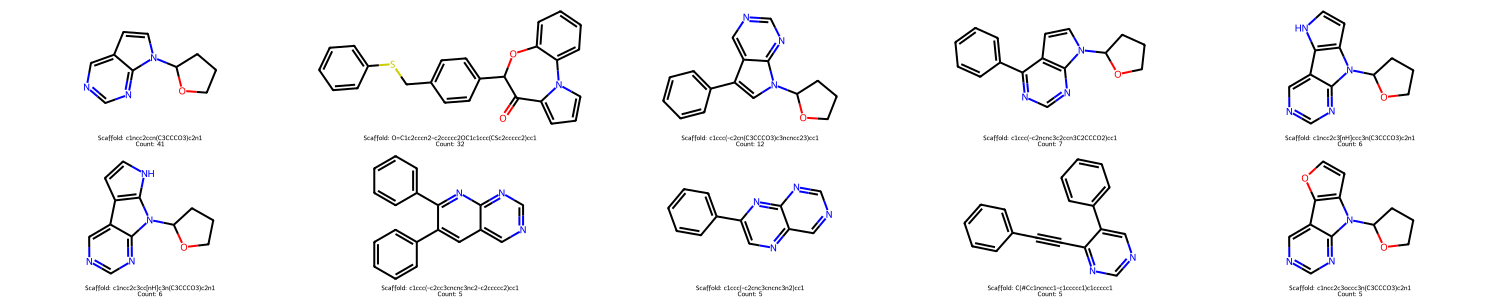

In [7]:
import pandas as pd
from rdkit import Chem
from collections import defaultdict
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Scaffolds import MurckoScaffold
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_csv('./0.csv')
smiles_list = data['canonical_smiles'].tolist()

def extract_skeleton(smiles):  
    """提取给定SMILES字符串的Murcko骨架"""  
    mol = Chem.MolFromSmiles(smiles)  
    if mol is None:  
        return None  
    try:  
        # 尝试使用新的模块路径 rdkit.Chem.Scaffolds  
        scaffold = Chem.MolToSmiles(Chem.Scaffolds.MurckoScaffold.GetScaffoldForMol(mol), isomericSmiles=False)  
    except AttributeError:  
        # 如果上述路径不可用，则抛出异常或返回 None（取决于您的需求）  
        print(f"MurckoScaffold not found for SMILES: {smiles}")  
        return None  
    return scaffold

# 统计骨架
skeleton_counts = defaultdict(int)
for smiles in smiles_list:
    skeleton = extract_skeleton(smiles)
    if skeleton:
        skeleton_counts[skeleton] += 1

# 输出骨架统计结果
num_unique_skeletons = len(skeleton_counts)
print(f"Murko骨架的总种类数: {num_unique_skeletons}")

# 找出出现次数在10次以内的分子骨架
skeletons_fewer_than_10 = {skeleton for skeleton, count in skeleton_counts.items() if count <= 10}
num_skeletons_fewer_than_10 = len(skeletons_fewer_than_10)
print(f"出现次数在10次以内的Murko骨架种类数: {num_skeletons_fewer_than_10}")

# 计算出现次数在10次以内的碳骨架种类数占总碳骨架种类数的比例
if num_unique_skeletons > 0:
    proportion_fewer_than_10 = num_skeletons_fewer_than_10 / num_unique_skeletons
    print(f"出现次数在10次以内的Murko骨架种类数占的比例: {proportion_fewer_than_10:.2f}")
else:
    print("没有Murko骨架数据可用于计算比例。")


# 找出并显示频率前十的骨架  
top_10_scaffolds = sorted(skeleton_counts.items(), key=lambda item: item[1], reverse=True)[:10]  
  
# 提取前10个scaffold的SMILES和计数  
scaffold_smiles = [s[0] for s in top_10_scaffolds]  
scaffold_counts = [s[1] for s in top_10_scaffolds]  
  
# 绘制前10个scaffold  
scaffold_mols = [Chem.MolFromSmiles(s) for s in scaffold_smiles]  
scaffold_labels = [f"Scaffold: {s}\nCount: {c}" for s, c in zip(scaffold_smiles, scaffold_counts)]  
  
# 生成图片  
img = Draw.MolsToGridImage(scaffold_mols, molsPerRow=5, subImgSize=(300, 150), legends=scaffold_labels)  
img

In [20]:
pip install --upgrade rdkit-pypi 

Looking in indexes: https://mirrors.ustc.edu.cn/pypi/web/simple
  Using cached https://mirrors.bfsu.edu.cn/pypi/web/packages/3d/5b/422edc92cbce125beb9767edaf482fdae521af9c411f4736b59e4528bf9b/rdkit_pypi-2022.9.5-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (29.4 MB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
# from rdkit import Chem
# from collections import defaultdict

# data = pd.read_csv('./train_dataset.csv')
# smiles_list = []
# for i in data.canonical_smiles:
#     smiles_list.append(i)

# def extract_skeleton(smiles):
#     mol = Chem.MolFromSmiles(smiles)
#     if mol is None:
#         return None
#     return Chem.MolToSmiles(Chem.MurckoDecompose(mol), isomericSmiles=False)  # 使用Murcko骨架

# skeleton_counts = defaultdict(int)

# for smiles in smiles_list:
#     skeleton = extract_skeleton(smiles)
#     if skeleton:
#         skeleton_counts[skeleton] += 1

# # 找出出现次数在10次以内的分子骨架
# skeletons_fewer_than_10 = {skeleton for skeleton, count in skeleton_counts.items() if count <= 10}

# # 输出出现次数10次以内的骨架种类数
# num_skeletons_fewer_than_10 = len(skeletons_fewer_than_10)
# print("出现次数在10次以内的Mroko骨架种类数:", num_skeletons_fewer_than_10)

出现次数在10次以内的Mroko骨架种类数: 212


### 碳骨架

In [17]:
import pandas as pd
from rdkit import Chem
from collections import defaultdict

# 读取数据
data = pd.read_csv('./ADK-chembl-568.csv')
smiles_list = data['canonical_smiles'].tolist()

def remove_non_carbon_atoms(mol):
    """移除分子中的非碳原子"""
    new_mol = Chem.RWMol(mol)  # 使用可写的分子模型
    # 收集需要移除的非碳原子的索引
    non_carbon_atoms = [atom.GetIdx() for atom in mol.GetAtoms() if atom.GetAtomicNum() != 6]
    # 从后向前移除原子，避免索引变化影响结果
    for idx in sorted(non_carbon_atoms, reverse=True):
        new_mol.RemoveAtom(idx)
    return new_mol.GetMol()

def extract_carbon_skeleton(smiles):
    """从SMILES字符串提取只包含碳原子的骨架"""
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    # 移除非碳原子
    carbon_mol = remove_non_carbon_atoms(mol)
    if carbon_mol.GetNumAtoms() == 0:  # 确保处理后的分子中还有原子存在
        return None
    # 生成纯碳骨架的SMILES表示
    return Chem.MolToSmiles(carbon_mol, isomericSmiles=False)

# 统计碳骨架
carbon_skeleton_counts = defaultdict(int)
for smiles in smiles_list:
    carbon_skeleton = extract_carbon_skeleton(smiles)
    if carbon_skeleton:
        carbon_skeleton_counts[carbon_skeleton] += 1

# 输出统计结果
num_unique_carbon_skeletons = len(carbon_skeleton_counts)
print(f"碳骨架的总种类数: {num_unique_carbon_skeletons}")

# 找出出现次数在10次以内的碳骨架
skeletons_fewer_than_10 = {skeleton for skeleton, count in carbon_skeleton_counts.items() if count <= 10}
num_skeletons_fewer_than_10 = len(skeletons_fewer_than_10)
print(f"出现次数在10次以内的碳骨架种类数: {num_skeletons_fewer_than_10}")

# 计算出现次数在10次以内的碳骨架种类数占总碳骨架种类数的比例
if num_unique_carbon_skeletons > 0:
    proportion_fewer_than_10 = num_skeletons_fewer_than_10 / num_unique_carbon_skeletons
    print(f"出现次数在10次以内的碳骨架种类数占的比例: {proportion_fewer_than_10:.2f}")
else:
    print("没有碳骨架数据可用于计算比例。")

碳骨架的总种类数: 334
出现次数在10次以内的碳骨架种类数: 331
出现次数在10次以内的碳骨架种类数占的比例: 0.99


In [18]:
import pandas as pd
from rdkit import Chem
from collections import defaultdict

# 读取数据
data = pd.read_csv('./1.csv')
smiles_list = data['canonical_smiles'].tolist()

def remove_non_carbon_atoms(mol):
    """移除分子中的非碳原子"""
    new_mol = Chem.RWMol(mol)  # 使用可写的分子模型
    # 收集需要移除的非碳原子的索引
    non_carbon_atoms = [atom.GetIdx() for atom in mol.GetAtoms() if atom.GetAtomicNum() != 6]
    # 从后向前移除原子，避免索引变化影响结果
    for idx in sorted(non_carbon_atoms, reverse=True):
        new_mol.RemoveAtom(idx)
    return new_mol.GetMol()

def extract_carbon_skeleton(smiles):
    """从SMILES字符串提取只包含碳原子的骨架"""
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    # 移除非碳原子
    carbon_mol = remove_non_carbon_atoms(mol)
    if carbon_mol.GetNumAtoms() == 0:  # 确保处理后的分子中还有原子存在
        return None
    # 生成纯碳骨架的SMILES表示
    return Chem.MolToSmiles(carbon_mol, isomericSmiles=False)

# 统计碳骨架
carbon_skeleton_counts = defaultdict(int)
for smiles in smiles_list:
    carbon_skeleton = extract_carbon_skeleton(smiles)
    if carbon_skeleton:
        carbon_skeleton_counts[carbon_skeleton] += 1

# 输出统计结果
num_unique_carbon_skeletons = len(carbon_skeleton_counts)
print(f"碳骨架的总种类数: {num_unique_carbon_skeletons}")

# 找出出现次数在10次以内的碳骨架
skeletons_fewer_than_10 = {skeleton for skeleton, count in carbon_skeleton_counts.items() if count <= 10}
num_skeletons_fewer_than_10 = len(skeletons_fewer_than_10)
print(f"出现次数在10次以内的碳骨架种类数: {num_skeletons_fewer_than_10}")

# 计算出现次数在10次以内的碳骨架种类数占总碳骨架种类数的比例
if num_unique_carbon_skeletons > 0:
    proportion_fewer_than_10 = num_skeletons_fewer_than_10 / num_unique_carbon_skeletons
    print(f"出现次数在10次以内的碳骨架种类数占的比例: {proportion_fewer_than_10:.2f}")
else:
    print("没有碳骨架数据可用于计算比例。")

碳骨架的总种类数: 166
出现次数在10次以内的碳骨架种类数: 164
出现次数在10次以内的碳骨架种类数占的比例: 0.99


In [2]:
import pandas as pd
from rdkit import Chem
from collections import defaultdict

# 读取数据
data = pd.read_csv('./0.csv')
smiles_list = data['canonical_smiles'].tolist()

def remove_non_carbon_atoms(mol):
    """移除分子中的非碳原子"""
    new_mol = Chem.RWMol(mol)  # 使用可写的分子模型
    # 收集需要移除的非碳原子的索引
    non_carbon_atoms = [atom.GetIdx() for atom in mol.GetAtoms() if atom.GetAtomicNum() != 6]
    # 从后向前移除原子，避免索引变化影响结果
    for idx in sorted(non_carbon_atoms, reverse=True):
        new_mol.RemoveAtom(idx)
    return new_mol.GetMol()

def extract_carbon_skeleton(smiles):
    """从SMILES字符串提取只包含碳原子的骨架"""
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    # 移除非碳原子
    carbon_mol = remove_non_carbon_atoms(mol)
    if carbon_mol.GetNumAtoms() == 0:  # 确保处理后的分子中还有原子存在
        return None
    # 生成纯碳骨架的SMILES表示
    return Chem.MolToSmiles(carbon_mol, isomericSmiles=False)

# 统计碳骨架
carbon_skeleton_counts = defaultdict(int)
for smiles in smiles_list:
    carbon_skeleton = extract_carbon_skeleton(smiles)
    if carbon_skeleton:
        carbon_skeleton_counts[carbon_skeleton] += 1

# 输出统计结果
num_unique_carbon_skeletons = len(carbon_skeleton_counts)
print(f"碳骨架的总种类数: {num_unique_carbon_skeletons}")

# 找出出现次数在10次以内的碳骨架
skeletons_fewer_than_10 = {skeleton for skeleton, count in carbon_skeleton_counts.items() if count <= 10}
num_skeletons_fewer_than_10 = len(skeletons_fewer_than_10)
print(f"出现次数在10次以内的碳骨架种类数: {num_skeletons_fewer_than_10}")

# 计算出现次数在10次以内的碳骨架种类数占总碳骨架种类数的比例
if num_unique_carbon_skeletons > 0:
    proportion_fewer_than_10 = num_skeletons_fewer_than_10 / num_unique_carbon_skeletons
    print(f"出现次数在10次以内的碳骨架种类数占的比例: {proportion_fewer_than_10:.2f}")
else:
    print("没有碳骨架数据可用于计算比例。")

碳骨架的总种类数: 184
出现次数在10次以内的碳骨架种类数: 182
出现次数在10次以内的碳骨架种类数占的比例: 0.99


### 绘图

In [11]:
conda update rdkit

Retrieving notices: ...working... done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.9.0
  latest version: 24.5.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.5.0



## Package Plan ##

  environment location: /home/md06/miniconda3/envs/fbw

  added / updated specs:
    - rdkit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |              mkl           6 KB  https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/main
    bottleneck-1.3.7           |   py38ha9d4c09_0         125 KB  https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/main
    brotli-1.0.9               |       h5eee18b_8          18 KB  https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/main
    brotli-bin-1.0.

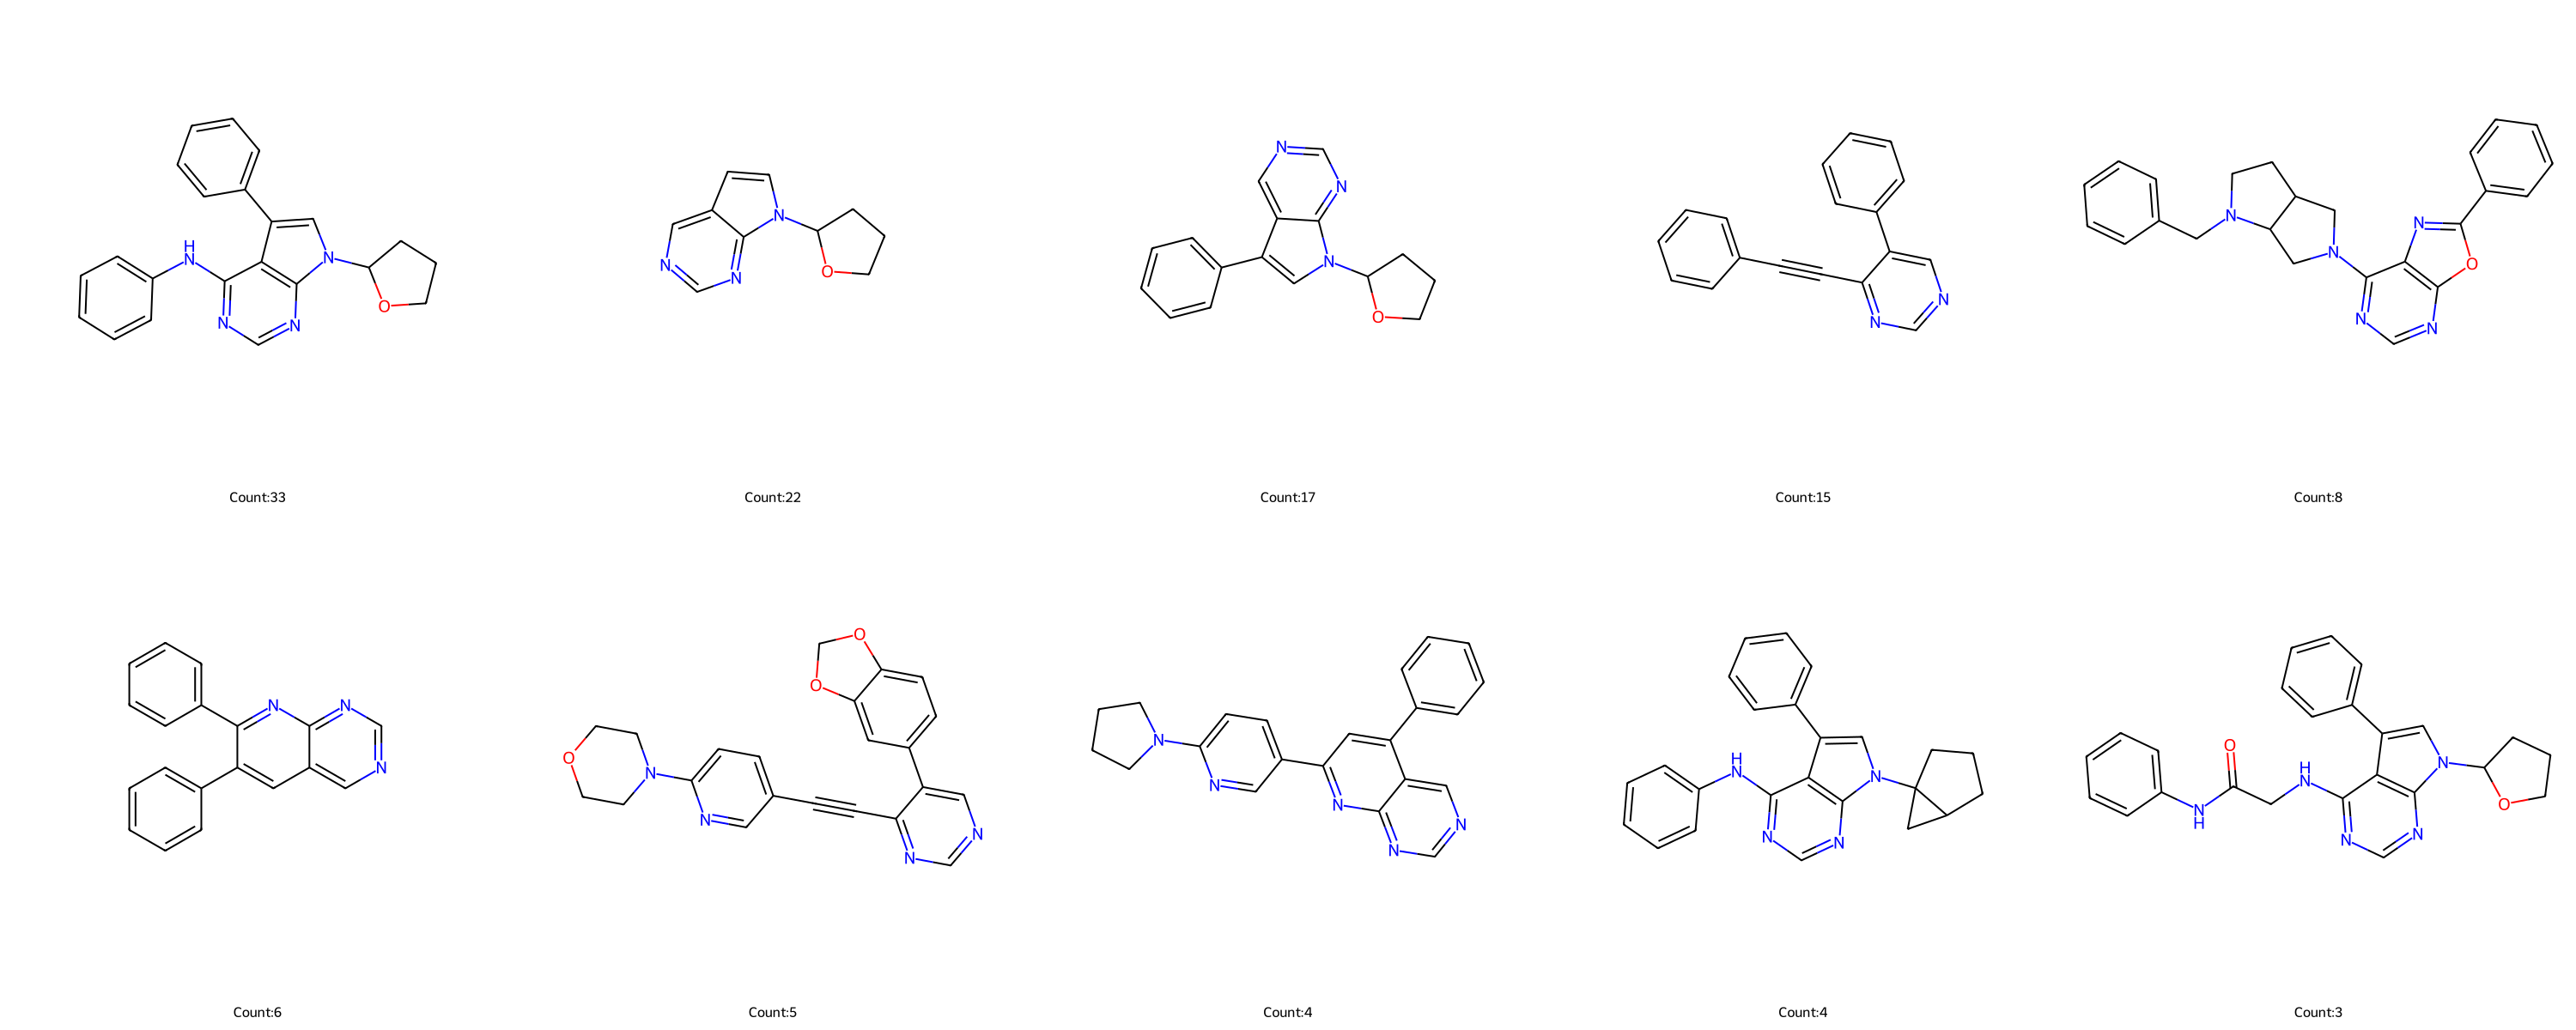

In [16]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from collections import defaultdict
import os
import pandas as pd
from rdkit import Chem
from collections import defaultdict
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Scaffolds import MurckoScaffold
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_csv('./1.csv')
smiles_list = data['canonical_smiles'].tolist()

def extract_skeleton(smiles):
    """提取给定SMILES字符串的Murcko骨架"""
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    scaffold = Chem.MolToSmiles(Chem.Scaffolds.MurckoScaffold.GetScaffoldForMol(mol), isomericSmiles=False)
    return scaffold

# 统计骨架
skeleton_counts = defaultdict(int)
for smiles in smiles_list:
    skeleton = extract_skeleton(smiles)
    if skeleton:
        skeleton_counts[skeleton] += 1

# 找出并显示频率前十的骨架
top_ten_skeletons = sorted(skeleton_counts.items(), key=lambda item: item[1], reverse=True)[:10]
top_ten_molecules = [Chem.MolFromSmiles(skeleton) for skeleton, count in top_ten_skeletons]

# 绘制前十的骨架
img = Draw.MolsToGridImage(top_ten_molecules, molsPerRow=5, subImgSize=(600, 600),
                           legends=[f"Count:{count}" for skeleton, count in top_ten_skeletons])
#img.save("1-Murko骨架.png")
img

In [7]:
import pandas as pd
from rdkit import Chem
from collections import defaultdict

# 读取数据
data = pd.read_csv('./0.csv')
smiles_list = data['canonical_smiles'].tolist()

def remove_non_carbon_atoms(mol):
    """移除分子中的非碳原子"""
    new_mol = Chem.RWMol(mol)  # 使用可写的分子模型
    # 收集需要移除的非碳原子的索引
    non_carbon_atoms = [atom.GetIdx() for atom in mol.GetAtoms() if atom.GetAtomicNum() != 6]
    # 从后向前移除原子，避免索引变化影响结果
    for idx in sorted(non_carbon_atoms, reverse=True):
        new_mol.RemoveAtom(idx)
    return new_mol.GetMol()

def extract_carbon_skeleton(smiles):
    """从SMILES字符串提取只包含碳原子的骨架"""
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    # 移除非碳原子
    carbon_mol = remove_non_carbon_atoms(mol)
    if carbon_mol.GetNumAtoms() == 0:  # 确保处理后的分子中还有原子存在
        return None
    # 生成纯碳骨架的SMILES表示
    return Chem.MolToSmiles(carbon_mol, isomericSmiles=False)

# 统计碳骨架
carbon_skeleton_counts = defaultdict(int)
for smiles in smiles_list:
    carbon_skeleton = extract_carbon_skeleton(smiles)
    if carbon_skeleton:
        carbon_skeleton_counts[carbon_skeleton] += 1

# 输出统计结果
num_unique_carbon_skeletons = len(carbon_skeleton_counts)
print(f"碳骨架的总种类数: {num_unique_carbon_skeletons}")

# 找出出现次数在10次以内的碳骨架
skeletons_fewer_than_10 = {skeleton for skeleton, count in carbon_skeleton_counts.items() if count <= 10}
num_skeletons_fewer_than_10 = len(skeletons_fewer_than_10)
print(f"出现次数在10次以内的碳骨架种类数: {num_skeletons_fewer_than_10}")

# 计算出现次数在10次以内的碳骨架种类数占总碳骨架种类数的比例
if num_unique_carbon_skeletons > 0:
    proportion_fewer_than_10 = num_skeletons_fewer_than_10 / num_unique_carbon_skeletons
    print(f"出现次数在10次以内的碳骨架种类数占的比例: {proportion_fewer_than_10:.2f}")
else:
    print("没有碳骨架数据可用于计算比例。")

碳骨架的总种类数: 184
出现次数在10次以内的碳骨架种类数: 182
出现次数在10次以内的碳骨架种类数占的比例: 0.99


In [8]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from collections import defaultdict

# 读取数据
data = pd.read_csv('./0.csv')
smiles_list = data['canonical_smiles'].tolist()

def convert_to_single_bond_carbon_only(mol):
    """将所有原子转换为碳原子，并将所有键转换为单键"""
    new_mol = Chem.RWMol(mol)  # 创建一个可编辑的分子副本
    # 将所有原子转换为碳
    for atom in new_mol.GetAtoms():
        atom.SetAtomicNum(6)  # 6 是碳的原子序号
    
    # 将所有键转换为单键
    for bond in new_mol.GetBonds():
        bond.SetBondType(Chem.BondType.SINGLE)
    
    return new_mol.GetMol()

def extract_carbon_skeleton(smiles):
    """从SMILES字符串提取只包含碳原子的骨架，且所有键均为单键"""
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    # 转换所有杂原子为碳原子，所有键为单键
    carbon_mol = convert_to_single_bond_carbon_only(mol)
    if carbon_mol.GetNumAtoms() == 0:  # 确保处理后的分子中还有原子存在
        return None
    # 生成处理后的骨架的SMILES表示
    return Chem.MolToSmiles(carbon_mol, isomericSmiles=False)

# 统计碳骨架
carbon_skeleton_counts = defaultdict(int)
for smiles in smiles_list:
    carbon_skeleton = extract_carbon_skeleton(smiles)
    if carbon_skeleton:
        carbon_skeleton_counts[carbon_skeleton] += 1

# 找出并显示频率前十的碳骨架
top_ten_skeletons = sorted(carbon_skeleton_counts.items(), key=lambda item: item[1], reverse=True)[:10]
top_ten_molecules = [Chem.MolFromSmiles(skeleton) for skeleton, count in top_ten_skeletons]

# 绘制前十的碳骨架
img = Draw.MolsToGridImage(top_ten_molecules, molsPerRow=5, subImgSize=(200, 200),
                           legends=[f"{count} occurrences" for skeleton, count in top_ten_skeletons])
img.show()

[23:21:00] Can't kekulize mol.  Unkekulized atoms: 5 6 7 13 14 16 17 18 19
[23:21:00] Can't kekulize mol.  Unkekulized atoms: 5 6 7 9 10 16 17 18 19
[23:21:00] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 15 16 17 18
[23:21:00] Can't kekulize mol.  Unkekulized atoms: 4 5 6 8 9 11 12 13 14
[23:21:00] Can't kekulize mol.  Unkekulized atoms: 5 6 7 9 10 12 13 14 15
[23:21:00] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 11 12 13 14
[23:21:00] Can't kekulize mol.  Unkekulized atoms: 2 3 4 13 14 15 16 17 19
[23:21:00] Can't kekulize mol.  Unkekulized atoms: 20 21 22 23 24 25 26 27 28 29 30
[23:21:00] Can't kekulize mol.  Unkekulized atoms: 18 19 20 21 22 23 24 25 26 27 28
[23:21:00] Can't kekulize mol.  Unkekulized atoms: 7 8 9 11 12 14 15 16 17
[23:21:00] 

****
Pre-condition Violation
no draw context
Violation occurred on line 214 in file /home/conda/feedstock_root/build_artifacts/rdkit_1660289026408/work/Code/GraphMol/MolDraw2D/MolDraw2DCairo.cpp
Failed Expression: dp_cr
****



RuntimeError: Pre-condition Violation
	no draw context
	Violation occurred on line 214 in file Code/GraphMol/MolDraw2D/MolDraw2DCairo.cpp
	Failed Expression: dp_cr
	RDKIT: 2022.03.5
	BOOST: 1_74
